In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Configurable parameters for pure pursuit
+ How fast do you want the robot to move? It is fixed at $v_{max}$ in this exercise
+ When can we declare the goal has been reached?
+ What is the lookahead distance? Determines the next position on the reference path that we want the vehicle to catch up to

In [5]:
vmax = 0.75
goal_threshold = 0.05
lookahead = 3.0

In [25]:
#You know what to do!
def simulate_unicycle(pose, v,w, dt=0.1):
    x, y, t = pose
#     print(pose)
    return x + v*np.cos(t)*dt, y + v*np.sin(t)*dt, t+w*dt

In [43]:
def euclidean(node1, node2):
    x1, y1 = node1
    x2, y2 = node2
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

class PurePursuitTracker(object):
    def __init__(self, x, y, v, lookahead = 3.0):
        """
        Tracks the path defined by x, y at velocity v
        x and y must be numpy arrays
        v and lookahead are floats
        """
        self.length = len(x)
        self.ref_idx = 0 #index on the path that tracker is to track
        self.lookahead = lookahead
        self.x, self.y = x, y
        self.v, self.w = v, 0

    def update(self, xc, yc, theta):
        """
        Input: xc, yc, theta - current pose of the robot
        Update v, w based on current pose
        Returns True if trajectory is over.
        """
        
        #Calculate ref_x, ref_y using current ref_idx
        #Check if we reached the end of path, then return TRUE
        #Two conditions must satisfy
        #1. ref_idx exceeds length of traj
        #2. ref_x, ref_y must be within goal_threshold
        # Write your code to check end condition
        ref_x, ref_y = self.x[self.ref_idx], self.y[self.ref_idx]
        goal_x, goal_y = self.x[-1], self.y[-1]
        if (self.ref_idx > self.length) and (np.linalg.norm([ref_x-goal_x, ref_y-goal_y])) < goal_threshold:
              return True
        
        #End of path has not been reached
        #update ref_idx using np.hypot([ref_x-xc, ref_y-yc]) < lookahead
        if (euclidean((xc,yc),(ref_x,ref_y))).any() < lookahead:
            self.ref_idx = self.ref_idx+1           
        #Find the anchor point
        # this is the line we drew between (0, 0) and (x, y)
        anchor = np.asarray([ref_x - xc, ref_y - yc])
        print(anchor)
        #Remember right now this is drawn from current robot pose
        #we have to rotate the anchor to (0, 0, pi/2)
        #code is given below for this
        theta = np.pi/2 - theta
#         print(theta)
#         rot = np.asarray([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        rot_n = np.asarray([(1,0),(0,1)])
        print(rot_n)
        anchor = np.dot(rot_n, anchor)
        
        L = (anchor[0] ** 2 + anchor[1] **2)**2 # dist to reference path
        X = anchor[0] #cross-track error
        #from the derivation in notes, plug in the formula for omega
        self.w = -(2*self.v/L**2)*self.x
        
        return False

## Visualize given trajectory

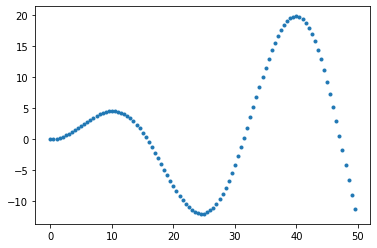

In [16]:
x = np.arange(0, 50, 0.5)
y = [np.sin(idx / 5.0) * idx / 2.0 for idx in x]

#write code here
plt.figure()
plt.plot(x, y,'.')

## Run the tracker simulation

1. Instantiate the tracker class
2. Initialize some starting pose
3. Simulate robot motion 1 step at a time - get $v$, $\omega$ from tracker, predict new pose using $v$, $\omega$, current pose in simulate_unicycle()
4. Stop simulation if tracker declares that end-of-path is reached
5. Record all parameters

In [44]:
#write code to instantiate the tracker class
tracker = PurePursuitTracker(x, y, vmax) 
pose = (-1, 0, np.pi/2) #arbitrary initial pose
x0,y0,t0 = pose # record it for plotting
# print(pose)
traj =[]
while True:
    #write the usual code to obtain successive poses
    pose = simulate_unicycle(pose, tracker.v, tracker.w)
#     print(pose)
    if tracker.update(*pose):
        print("ARRIVED!!")    
        break
    traj.append([*pose, tracker.w, tracker.ref_idx])

[ 1.    -0.075]
[[1 0]
 [0 1]]
[ 1.5        -0.12504165]
[[1 0]
 [0 1]]
[[ 2.00000000e+00  1.99450473e+00  1.98903900e+00  1.98363220e+00
   1.97831339e+00  1.97311115e+00  1.96805347e+00  1.96316752e+00
   1.95847957e+00  1.95401483e+00  1.94979729e+00  1.94584964e+00
   1.94219307e+00  1.93884727e+00  1.93583021e+00  1.93315810e+00
   1.93084533e+00  1.92890431e+00  1.92734549e+00  1.92617723e+00
   1.92540583e+00  1.92503544e+00  1.92506803e+00  1.92550343e+00
   1.92633932e+00  1.92757118e+00  1.92919241e+00  1.93119427e+00
   1.93356603e+00  1.93629491e+00  1.93936626e+00  1.94276355e+00
   1.94646854e+00  1.95046130e+00  1.95472037e+00  1.95922285e+00
   1.96394454e+00  1.96886005e+00  1.97394296e+00  1.97916595e+00
   1.98450094e+00  1.98991925e+00  1.99539175e+00  2.00088902e+00
   2.00638151e+00  2.01183970e+00  2.01723424e+00  2.02253613e+00
   2.02771688e+00  2.03274862e+00  2.03760432e+00  2.04225787e+00
   2.04668424e+00  2.05085966e+00  2.05476166e+00  2.05836928e+00
   2

IndexError: index 100 is out of bounds for axis 0 with size 100

/Users/krishnac/anaconda3/envs/ap/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

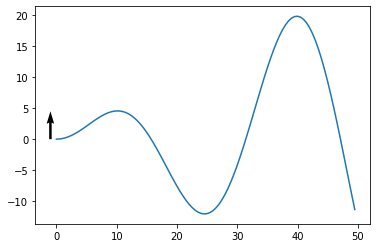

In [45]:
xs,ys,ts,ws,ids = zip(*traj)
plt.figure()
plt.plot(x,y,label='Reference')
plt.quiver(x0,y0, np.cos(t0), np.sin(t0),scale=12)
plt.plot(xs,ys,label='Tracked')
x0,y0,t0 = pose
plt.quiver(x0,y0, np.cos(t0), np.sin(t0),scale=12)
plt.title('Pure Pursuit trajectory')
plt.legend()
plt.grid()

# Visualize curvature

<IPython.core.display.Javascript object>


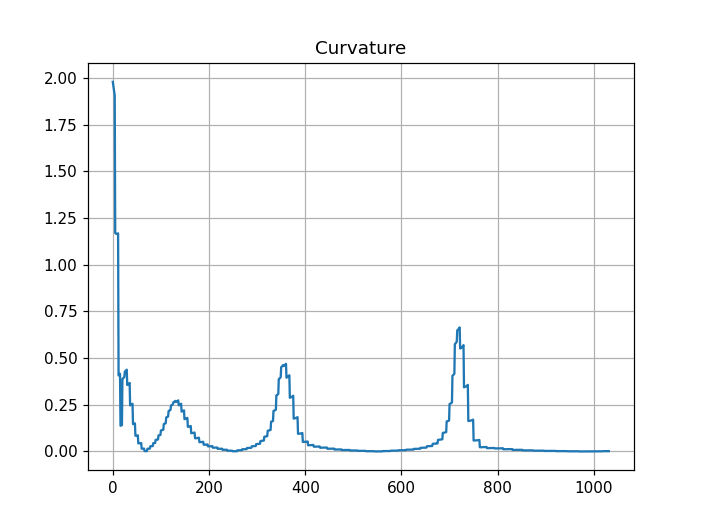

In [ ]:
plt.figure()
plt.title('Curvature')
plt.plot(np.abs(ws))
plt.grid()


## Animate

Make a video to plot the current pose of the robot and reference pose it is trying to track. You can use funcAnimation in matplotlib

## Effect of noise in simulations

What happens if you add a bit of Gaussian noise to the simulate_unicycle() output? Is the tracker still robust?

The noise signifies that $v$, $\omega$ commands did not get realized exactly
